In [1]:
import pandas as pd

In [23]:
url = r"C:\Users\Ramu M\Downloads\Fraudulent_Claims_Dataset.csv"

df = pd.read_csv(url)
df.head()

,Claim_ID,Claim_Date,Policy_Issuance_Date,Customer_ID,Claim_Amount,Claim_Type,Annual_Income,Suspicious_Flags,Fraud_Label
0,CLM000001,10-10-2020,21-12-2012,CUST4020,20635.68,Home,120769.55,0,0
1,CLM000002,03-06-2023,02-06-2018,CUST8985,34662.22,Life,412022.47,0,0
2,CLM000003,06-04-2023,05-01-2022,CUST2792,64847.97,Home,110227.23,0,0
3,CLM000004,10-03-2023,29-04-2014,CUST9410,16906.56,Life,91553.79,0,0
4,CLM000005,26-01-2023,08-09-2018,CUST1702,64860.47,Life,53075.22,1,1


In [3]:
df.shape

(5000, 9)

In [4]:
df['Claim-to-Income Ratio'] =  df['Claim_Amount'] / df['Annual_Income']

In [5]:
df = df[df['Annual_Income'] > 0]  # Remove zero or negative incomes
df['Claim-to-Income Ratio'] = df['Claim_Amount'] / df['Annual_Income']


In [6]:
df.head(1)

,Claim_ID,Claim_Date,Policy_Issuance_Date,Customer_ID,Claim_Amount,Claim_Type,Annual_Income,Suspicious_Flags,Fraud_Label,Claim-to-Income Ratio
0,CLM000001,10-10-2020,21-12-2012,CUST4020,20635.68,Home,120769.55,0,0,0.170868


In [7]:
df.columns

Index(['Claim_ID', 'Claim_Date', 'Policy_Issuance_Date', 'Customer_ID',
       'Claim_Amount', 'Claim_Type', 'Annual_Income', 'Suspicious_Flags',
       'Fraud_Label', 'Claim-to-Income Ratio'],
      dtype='object')

In [8]:
df.duplicated().sum()

0

In [9]:
df.columns = df.columns.str.lower()

In [10]:
df['Claim_Date'] = pd.to_datetime(df['claim_date'], dayfirst=True)
df['Policy_Issuance_Date'] = pd.to_datetime(df['policy_issuance_date'], dayfirst=True)


In [11]:
df['Days_Since_Policy'] = (df['Claim_Date'] - df['Policy_Issuance_Date']).dt.days


In [12]:
df['Early_Claim_Flag'] = df['Days_Since_Policy'] <= 30


In [13]:
df.head()

,claim_id,claim_date,policy_issuance_date,customer_id,claim_amount,claim_type,annual_income,suspicious_flags,fraud_label,claim-to-income ratio,Claim_Date,Policy_Issuance_Date,Days_Since_Policy,Early_Claim_Flag
0,CLM000001,10-10-2020,21-12-2012,CUST4020,20635.68,Home,120769.55,0,0,0.170868,2020-10-10,2012-12-21,2850,False
1,CLM000002,03-06-2023,02-06-2018,CUST8985,34662.22,Life,412022.47,0,0,0.084127,2023-06-03,2018-06-02,1827,False
2,CLM000003,06-04-2023,05-01-2022,CUST2792,64847.97,Home,110227.23,0,0,0.588312,2023-04-06,2022-01-05,456,False
3,CLM000004,10-03-2023,29-04-2014,CUST9410,16906.56,Life,91553.79,0,0,0.184663,2023-03-10,2014-04-29,3237,False
4,CLM000005,26-01-2023,08-09-2018,CUST1702,64860.47,Life,53075.22,1,1,1.222048,2023-01-26,2018-09-08,1601,False


In [14]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Claim_Type_encoded'] = encoder.fit_transform(df['claim_type'])

In [15]:
df.describe()

,claim_amount,annual_income,suspicious_flags,fraud_label,claim-to-income ratio,Claim_Date,Policy_Issuance_Date,Days_Since_Policy,Claim_Type_encoded
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000,5000,5000.000000,5000.000000
mean,33668.196580,149418.884660,0.159000,0.148800,0.651600,2022-07-04 23:06:25.919999744,2016-12-20 11:59:42.720000,2022.463000,1.494000
min,1029.970000,1575.250000,0.000000,0.000000,0.003819,2019-12-13 00:00:00,2010-01-29 00:00:00,8.000000,0.000000
25%,15815.672500,62364.892500,0.000000,0.000000,0.105793,2021-04-01 00:00:00,2014-09-18 18:00:00,1217.750000,0.000000
50%,27835.455000,125248.030000,0.000000,0.000000,0.232923,2022-07-09 12:00:00,2016-12-21 00:00:00,2032.500000,1.000000
75%,47101.642500,216051.562500,0.000000,0.000000,0.535990,2023-10-11 00:00:00,2019-03-26 06:00:00,2834.500000,3.000000
max,99991.090000,483352.660000,1.000000,1.000000,40.545682,2024-12-30 00:00:00,2023-11-10 00:00:00,3650.000000,3.000000
std,22918.251982,107992.772865,0.365713,0.355927,1.902217,NaN,NaN,946.016046,1.130407


In [16]:
df.isnull().sum()

claim_id                 0
claim_date               0
policy_issuance_date     0
customer_id              0
claim_amount             0
claim_type               0
annual_income            0
suspicious_flags         0
fraud_label              0
claim-to-income ratio    0
Claim_Date               0
Policy_Issuance_Date     0
Days_Since_Policy        0
Early_Claim_Flag         0
Claim_Type_encoded       0
dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   claim_id               5000 non-null   object        
 1   claim_date             5000 non-null   object        
 2   policy_issuance_date   5000 non-null   object        
 3   customer_id            5000 non-null   object        
 4   claim_amount           5000 non-null   float64       
 5   claim_type             5000 non-null   object        
 6   annual_income          5000 non-null   float64       
 7   suspicious_flags       5000 non-null   int64         
 8   fraud_label            5000 non-null   int64         
 9   claim-to-income ratio  5000 non-null   float64       
 10  Claim_Date             5000 non-null   datetime64[ns]
 11  Policy_Issuance_Date   5000 non-null   datetime64[ns]
 12  Days_Since_Policy      5000 non-null   int64         
 13  Ear

In [18]:
# Correct feature names
features = ['claim-to-income ratio', 'claim_amount', 'Days_Since_Policy']

# Prepare the data
X = df[features]

# Normalize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

# 1. Elliptic Envelope
ee = EllipticEnvelope(contamination=0.05)
df['Outlier_EE'] = ee.fit_predict(X_scaled)

# 2. Isolation Forest
iso = IsolationForest(contamination=0.05, random_state=42)
df['Outlier_IF'] = iso.fit_predict(X_scaled)

# 3. Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
df['Outlier_LOF'] = lof.fit_predict(X_scaled)


In [20]:
df.shape

(5000, 18)

In [21]:
df.head(1)

,claim_id,claim_date,policy_issuance_date,customer_id,claim_amount,claim_type,annual_income,suspicious_flags,fraud_label,claim-to-income ratio,Claim_Date,Policy_Issuance_Date,Days_Since_Policy,Early_Claim_Flag,Claim_Type_encoded,Outlier_EE,Outlier_IF,Outlier_LOF
0,CLM000001,10-10-2020,21-12-2012,CUST4020,20635.68,Home,120769.55,0,0,0.170868,2020-10-10,2012-12-21,2850,False,1,1,1,1


In [22]:
from sklearn.preprocessing import LabelEncoder

# List of categorical columns
categorical_cols = ['claim_id', 'customer_id', 'claim_type']  # Add more if needed

# Apply Label Encoding
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col + '_E'] = le.fit_transform(df[col])
    label_encoders[col] = le


In [22]:
df.head()

,claim_id,claim_date,policy_issuance_date,customer_id,claim_amount,claim_type,annual_income,suspicious_flags,fraud_label,claim-to-income ratio,...,Policy_Issuance_Date,Days_Since_Policy,Early_Claim_Flag,Claim_Type_encoded,Outlier_EE,Outlier_IF,Outlier_LOF,claim_id_E,customer_id_E,claim_type_E
0,CLM000001,10-10-2020,21-12-2012,CUST4020,20635.68,Home,120769.55,0,0,0.170868,...,2012-12-21,2850,False,1,1,1,1,0,1258,1
1,CLM000002,03-06-2023,02-06-2018,CUST8985,34662.22,Life,412022.47,0,0,0.084127,...,2018-06-02,1827,False,2,1,1,1,1,3398,2
2,CLM000003,06-04-2023,05-01-2022,CUST2792,64847.97,Home,110227.23,0,0,0.588312,...,2022-01-05,456,False,1,1,1,1,2,738,1
3,CLM000004,10-03-2023,29-04-2014,CUST9410,16906.56,Life,91553.79,0,0,0.184663,...,2014-04-29,3237,False,2,1,1,1,3,3583,2
4,CLM000005,26-01-2023,08-09-2018,CUST1702,64860.47,Life,53075.22,1,1,1.222048,...,2018-09-08,1601,False,2,1,1,1,4,299,2


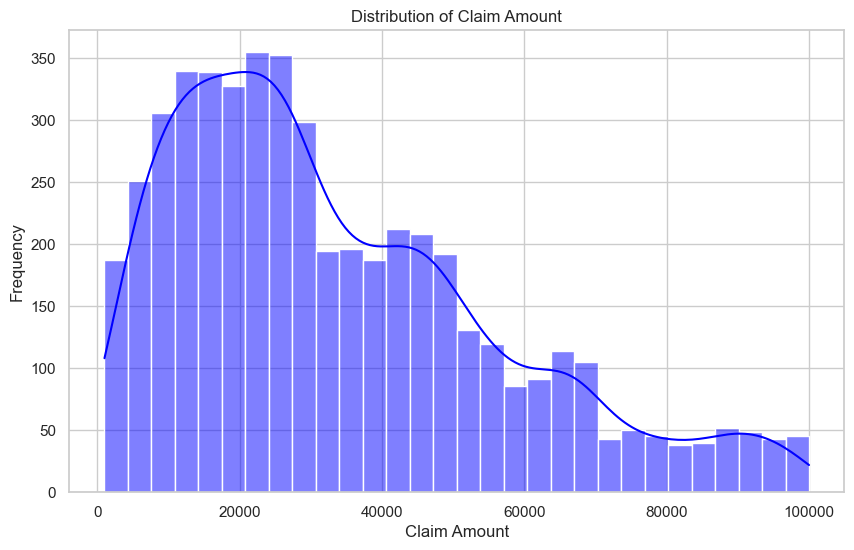

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame named 'df' loaded with your data
# If needed, replace 'df' with the actual name of your dataframe.

# Set the plot style
sns.set(style="whitegrid")

# 1. Distribution of Claim Amount
plt.figure(figsize=(10, 6))
sns.histplot(df['claim_amount'], kde=True, color='blue', bins=30)
plt.title('Distribution of Claim Amount')
plt.xlabel('Claim Amount')
plt.ylabel('Frequency')
plt.show()


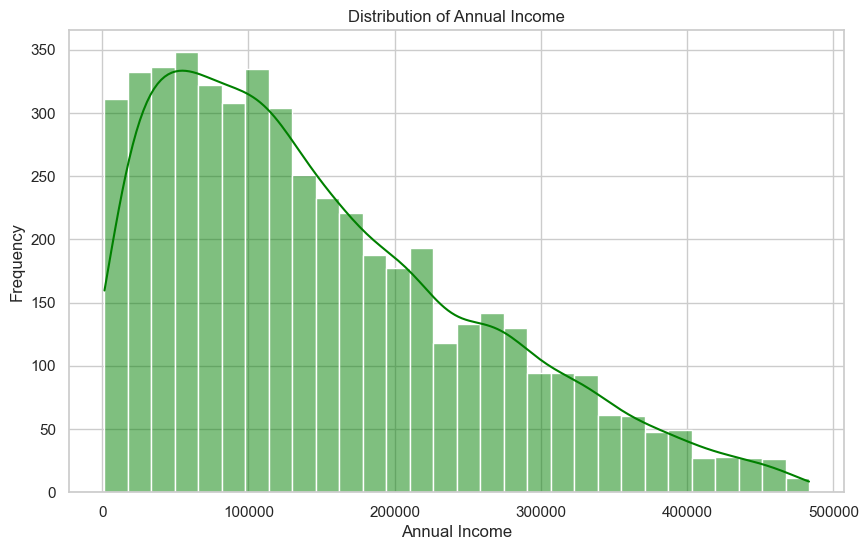

In [28]:

# 2. Distribution of Annual Income
plt.figure(figsize=(10, 6))
sns.histplot(df['annual_income'], kde=True, color='green', bins=30)
plt.title('Distribution of Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.show()

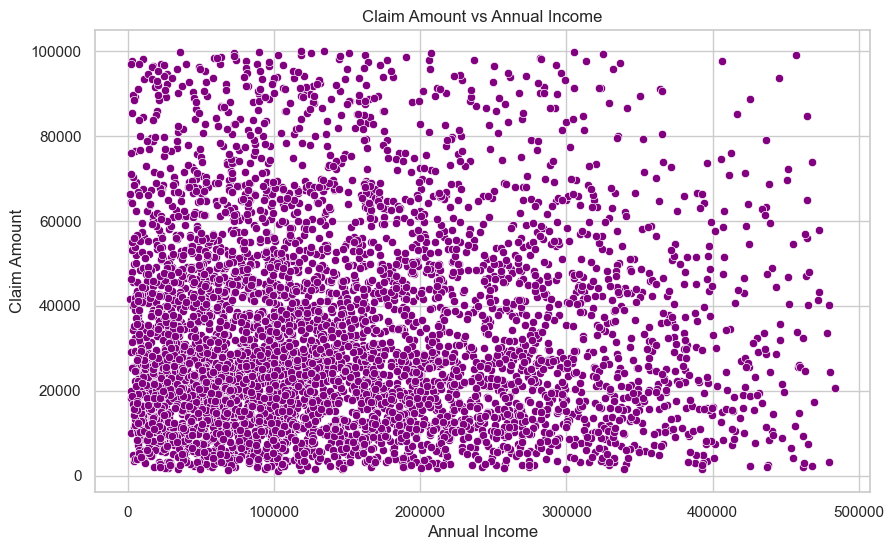

In [29]:
# 3. Claim Amount vs Annual Income (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='annual_income', y='claim_amount', data=df, color='purple')
plt.title('Claim Amount vs Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Claim Amount')
plt.show()

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_28576\2724676982.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='claim_type', data=df, palette='Set2')


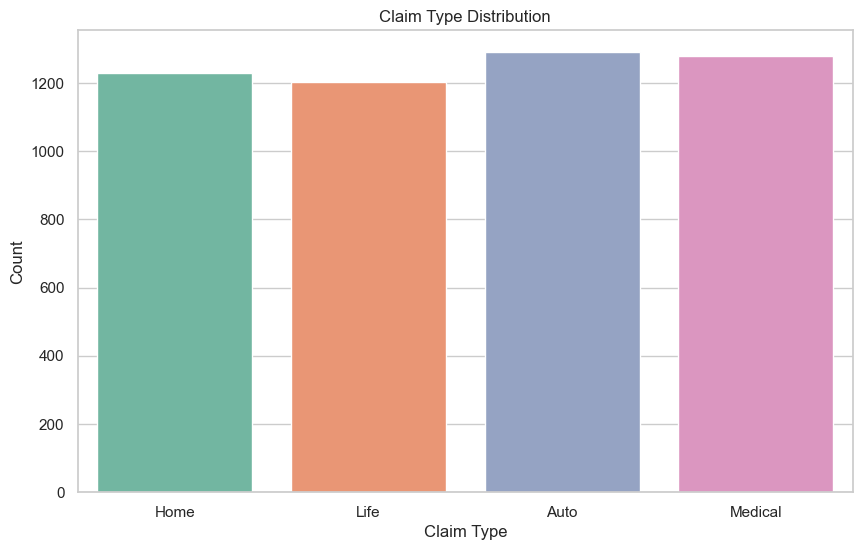

In [30]:
# 4. Claim Type Distribution (Bar Plot)
plt.figure(figsize=(10, 6))
sns.countplot(x='claim_type', data=df, palette='Set2')
plt.title('Claim Type Distribution')
plt.xlabel('Claim Type')
plt.ylabel('Count')
plt.show()

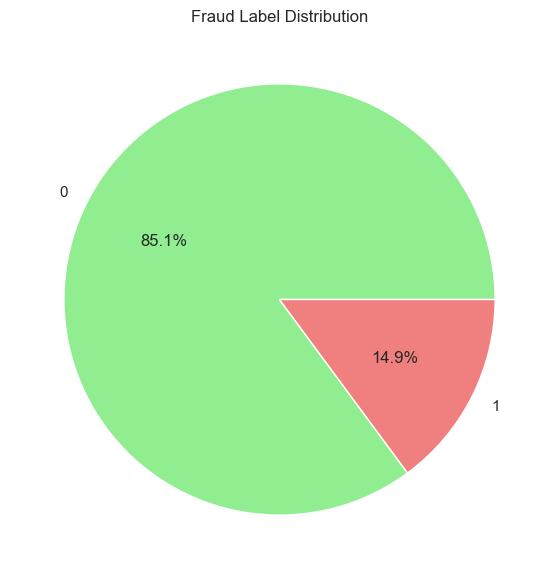

In [32]:
# 5. Fraud Label Distribution (Pie Chart)
plt.figure(figsize=(7, 7))
df['fraud_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Fraud Label Distribution')
plt.ylabel('')
plt.show()

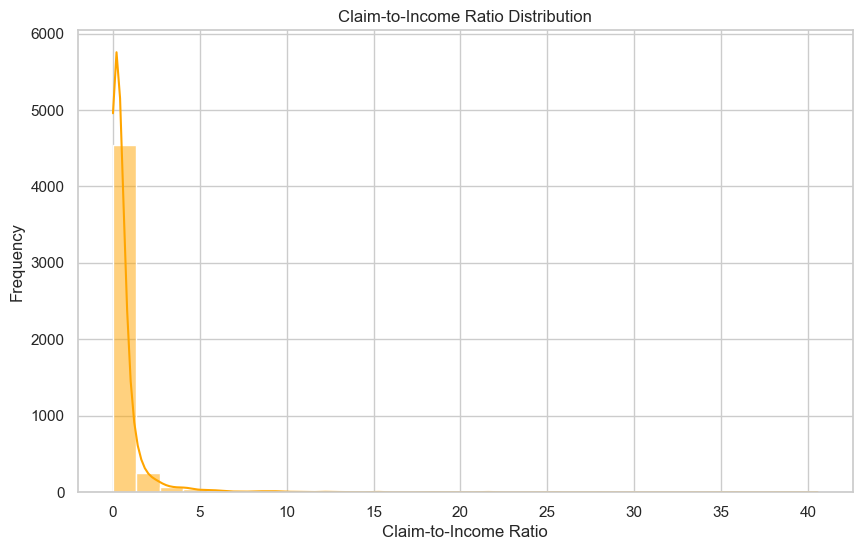

In [33]:
# 6. Claim-to-Income Ratio Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['claim-to-income ratio'], kde=True, color='orange', bins=30)
plt.title('Claim-to-Income Ratio Distribution')
plt.xlabel('Claim-to-Income Ratio')
plt.ylabel('Frequency')
plt.show()

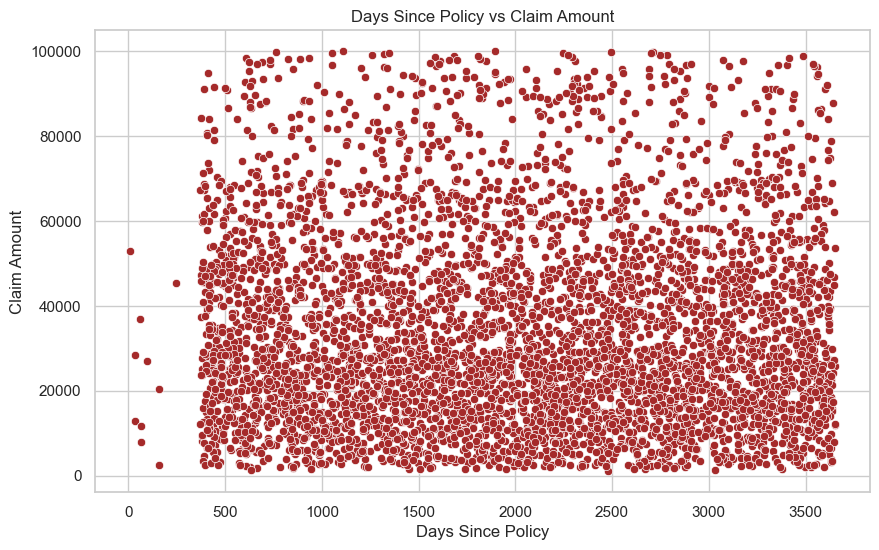

In [34]:
# 7. Days Since Policy vs Claim Amount (Scatter Plot)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Days_Since_Policy', y='claim_amount', data=df, color='brown')
plt.title('Days Since Policy vs Claim Amount')
plt.xlabel('Days Since Policy')
plt.ylabel('Claim Amount')
plt.show()


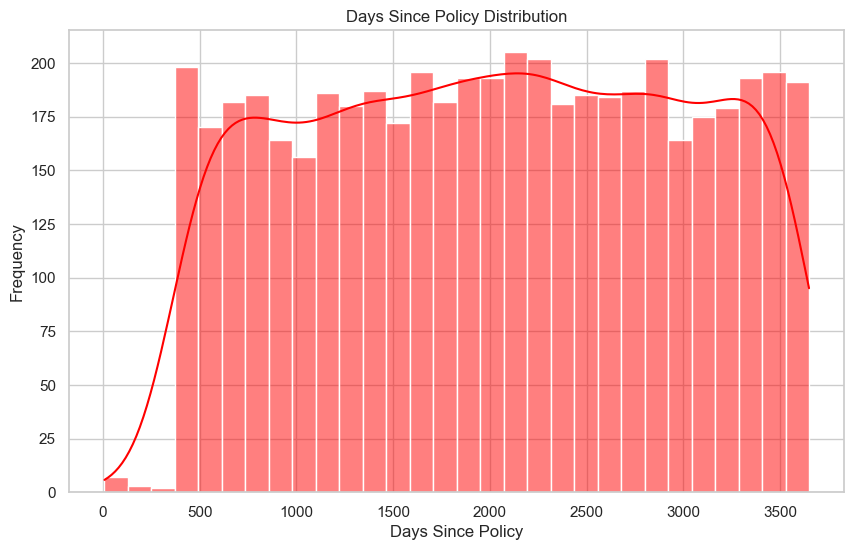

In [35]:
# 8. Days Since Policy Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Days_Since_Policy'], kde=True, color='red', bins=30)
plt.title('Days Since Policy Distribution')
plt.xlabel('Days Since Policy')
plt.ylabel('Frequency')
plt.show()

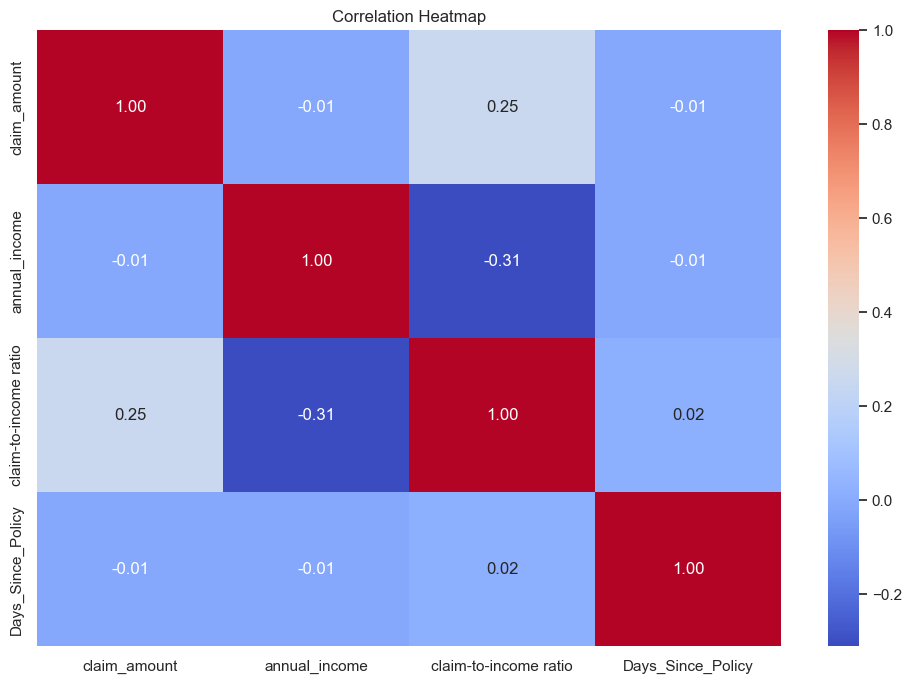

In [36]:
# 9. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df[['claim_amount', 'annual_income', 'claim-to-income ratio', 'Days_Since_Policy']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_28576\1227165620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='suspicious_flags', y='claim_amount', data=df, palette='Set2')


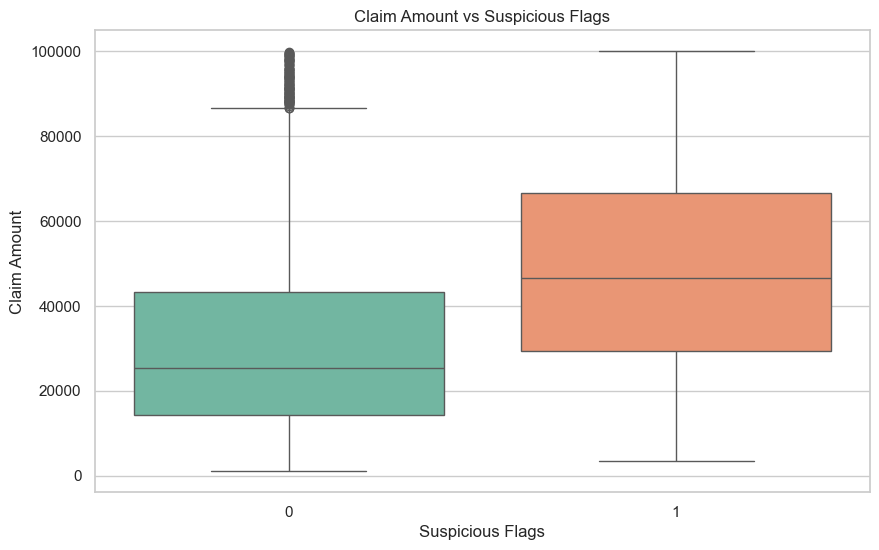

In [37]:
# 10. Claim Amount vs Suspicious Flags (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='suspicious_flags', y='claim_amount', data=df, palette='Set2')
plt.title('Claim Amount vs Suspicious Flags')
plt.xlabel('Suspicious Flags')
plt.ylabel('Claim Amount')
plt.show()


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_28576\1213166974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Early_Claim_Flag', data=df, palette='pastel')


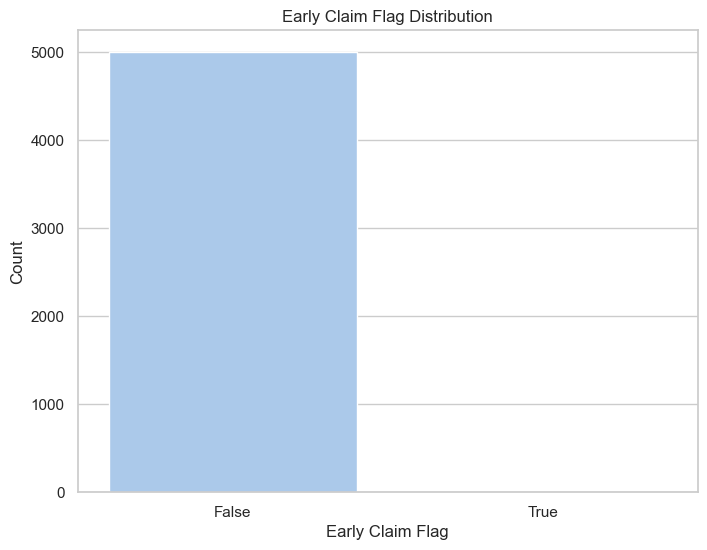

In [38]:
# 11. Early Claim Flag Distribution (Bar Plot)
plt.figure(figsize=(8, 6))
sns.countplot(x='Early_Claim_Flag', data=df, palette='pastel')
plt.title('Early Claim Flag Distribution')
plt.xlabel('Early Claim Flag')
plt.ylabel('Count')
plt.show()

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_28576\1749431945.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlier_EE', y='claim_amount', data=df, palette='muted')


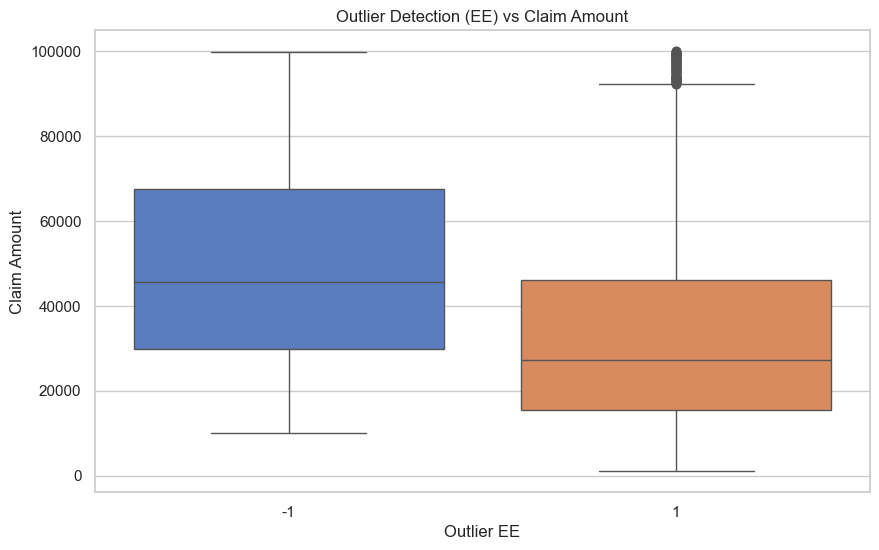

In [39]:
# 12. Outlier Detection by Outlier Method (Box Plot)
# Outlier_EE
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlier_EE', y='claim_amount', data=df, palette='muted')
plt.title('Outlier Detection (EE) vs Claim Amount')
plt.xlabel('Outlier EE')
plt.ylabel('Claim Amount')
plt.show()


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_28576\3259269955.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlier_IF', y='claim_amount', data=df, palette='muted')


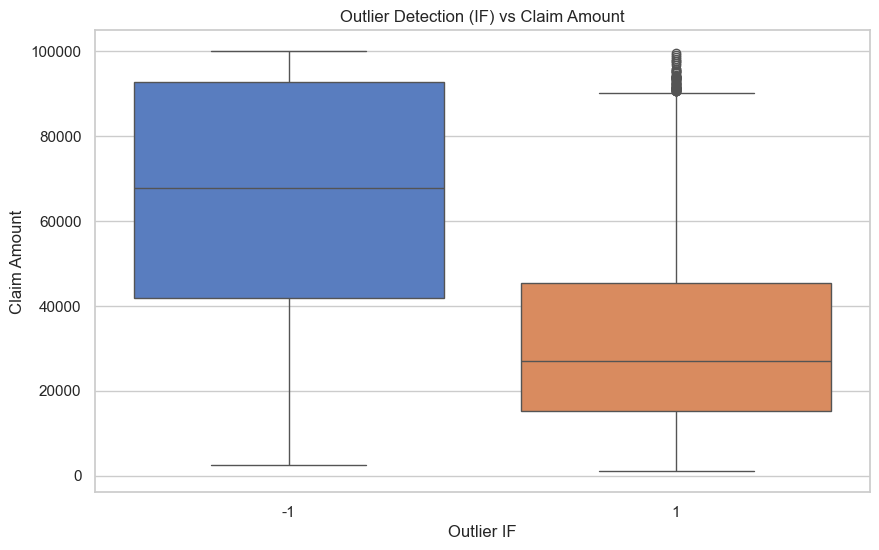

In [40]:
# Outlier_IF
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlier_IF', y='claim_amount', data=df, palette='muted')
plt.title('Outlier Detection (IF) vs Claim Amount')
plt.xlabel('Outlier IF')
plt.ylabel('Claim Amount')
plt.show()

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_28576\3502602829.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outlier_LOF', y='claim_amount', data=df, palette='muted')


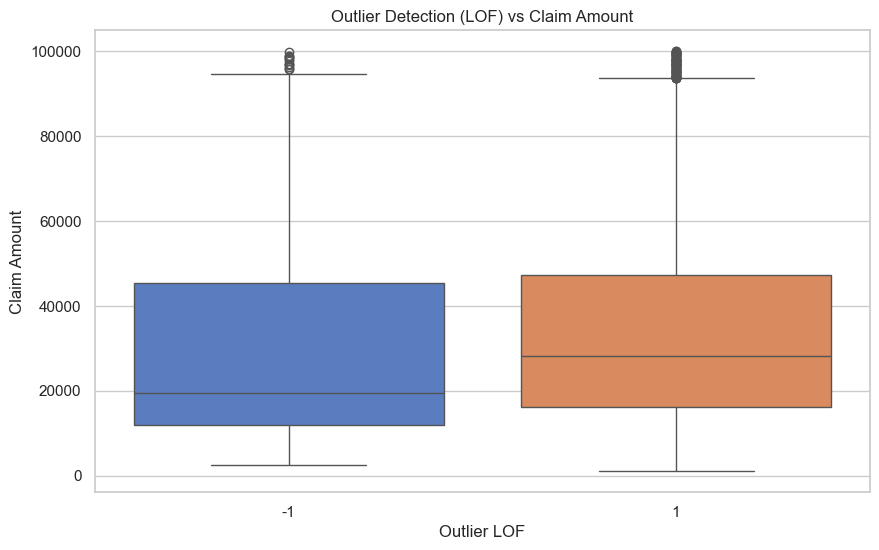

In [41]:
# Outlier_LOF
plt.figure(figsize=(10, 6))
sns.boxplot(x='Outlier_LOF', y='claim_amount', data=df, palette='muted')
plt.title('Outlier Detection (LOF) vs Claim Amount')
plt.xlabel('Outlier LOF')
plt.ylabel('Claim Amount')
plt.show()

C:\Users\Ramu M\AppData\Local\Temp\ipykernel_28576\2123677723.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='claim_type', y='claim_amount', data=df, palette='Set3')


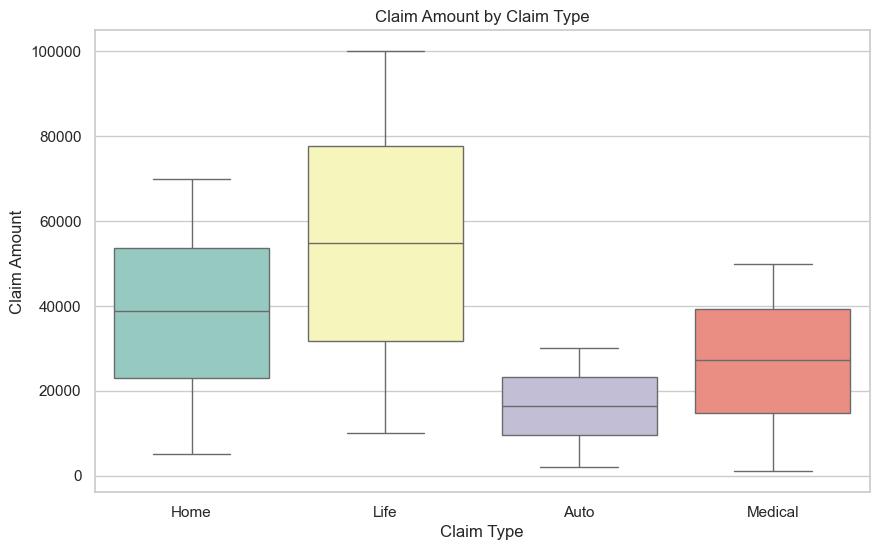

In [42]:
# 13. Claim Amount by Claim Type (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='claim_type', y='claim_amount', data=df, palette='Set3')
plt.title('Claim Amount by Claim Type')
plt.xlabel('Claim Type')
plt.ylabel('Claim Amount')
plt.show()


C:\Users\Ramu M\AppData\Local\Temp\ipykernel_28576\2724693334.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='fraud_label', y='claim_amount', data=df, palette='coolwarm')


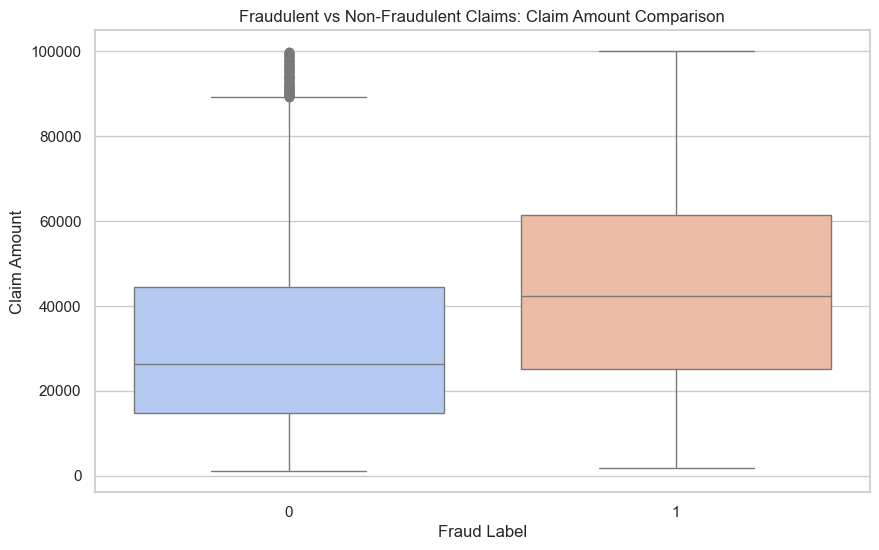

In [43]:
# 14. Fraudulent vs Non-Fraudulent Claims: Claim Amount Comparison (Box Plot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='fraud_label', y='claim_amount', data=df, palette='coolwarm')
plt.title('Fraudulent vs Non-Fraudulent Claims: Claim Amount Comparison')
plt.xlabel('Fraud Label')
plt.ylabel('Claim Amount')
plt.show()

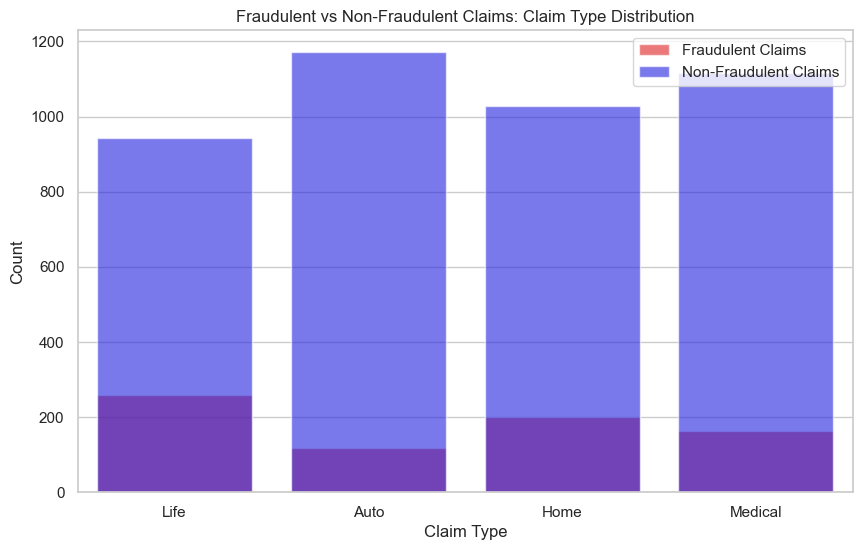

In [44]:
# 15. Fraudulent vs Non-Fraudulent Claims: Claim Type Distribution (Stacked Bar Plot)
fraud_claims = df[df['fraud_label'] == 1]
non_fraud_claims = df[df['fraud_label'] == 0]

plt.figure(figsize=(10, 6))
sns.countplot(x='claim_type', data=fraud_claims, label='Fraudulent Claims', color='red', alpha=0.6)
sns.countplot(x='claim_type', data=non_fraud_claims, label='Non-Fraudulent Claims', color='blue', alpha=0.6)
plt.title('Fraudulent vs Non-Fraudulent Claims: Claim Type Distribution')
plt.xlabel('Claim Type')
plt.ylabel('Count')
plt.legend()
plt.show()

In [33]:
df.head()

,claim_id,claim_date,policy_issuance_date,customer_id,claim_amount,claim_type,annual_income,suspicious_flags,fraud_label,claim-to-income ratio,...,Policy_Issuance_Date,Days_Since_Policy,Early_Claim_Flag,Claim_Type_encoded,Outlier_EE,Outlier_IF,Outlier_LOF,claim_id_E,customer_id_E,claim_type_E
0,CLM000001,10-10-2020,21-12-2012,CUST4020,20635.68,Home,120769.55,0,0,0.170868,...,2012-12-21,2850,False,1,1,1,1,0,1258,1
1,CLM000002,03-06-2023,02-06-2018,CUST8985,34662.22,Life,412022.47,0,0,0.084127,...,2018-06-02,1827,False,2,1,1,1,1,3398,2
2,CLM000003,06-04-2023,05-01-2022,CUST2792,64847.97,Home,110227.23,0,0,0.588312,...,2022-01-05,456,False,1,1,1,1,2,738,1
3,CLM000004,10-03-2023,29-04-2014,CUST9410,16906.56,Life,91553.79,0,0,0.184663,...,2014-04-29,3237,False,2,1,1,1,3,3583,2
4,CLM000005,26-01-2023,08-09-2018,CUST1702,64860.47,Life,53075.22,1,1,1.222048,...,2018-09-08,1601,False,2,1,1,1,4,299,2


In [24]:
df.columns

Index(['Claim_ID', 'Claim_Date', 'Policy_Issuance_Date', 'Customer_ID',
       'Claim_Amount', 'Claim_Type', 'Annual_Income', 'Suspicious_Flags',
       'Fraud_Label'],
      dtype='object')

In [25]:
df.dtypes

Claim_ID                 object
Claim_Date               object
Policy_Issuance_Date     object
Customer_ID              object
Claim_Amount            float64
Claim_Type               object
Annual_Income           float64
Suspicious_Flags          int64
Fraud_Label               int64
dtype: object

In [25]:
import pandas as pd

# Suppose your DataFrame is named 'df'
drop_cols = [
    'claim_id',
    'customer_id',
    'claim_id_E',
    'customer_id_E',
    'claim_date',
    'policy_issuance_date',
    'Claim_Date',              
    'Policy_Issuance_Date',
    'Early_Claim_Flag',
    'claim_type'  # Drop only if you're using encoded version
]

# Drop the columns
df = df.drop(columns=drop_cols)


In [26]:
df.shape

(5000, 9)

In [27]:
# Save to CSV
df.to_csv('fraudulent_claim.csv', index=False)

print("CSV file saved successfully.")

CSV file saved successfully.


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [30]:
X = df.drop([ 'suspicious_flags', 'fraud_label'], axis=1)
y = df['fraud_label']


In [31]:
df['fraud_label'].value_counts()

fraud_label
0    4256
1     744
Name: count, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now you can safely print the datatypes
print(X_train.dtypes)


claim_amount             float64
annual_income            float64
claim-to-income ratio    float64
Days_Since_Policy          int64
Claim_Type_encoded         int32
Outlier_EE                 int32
Outlier_IF                 int32
Outlier_LOF                int32
claim_type_E               int32
dtype: object


In [33]:
# Identify columns with 'object' data type
object_columns = X_train.select_dtypes(include='object').columns

# Drop the 'object' columns from X_train
X_train = X_train.drop(object_columns, axis=1)

# Verify columns after dropping
print(X_train.dtypes)


claim_amount             float64
annual_income            float64
claim-to-income ratio    float64
Days_Since_Policy          int64
Claim_Type_encoded         int32
Outlier_EE                 int32
Outlier_IF                 int32
Outlier_LOF                int32
claim_type_E               int32
dtype: object


In [34]:
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns
print("Datetime columns:", datetime_cols)


Datetime columns: Index([], dtype='object')


In [35]:
X_train_cleaned = X_train.drop(columns=datetime_cols)


In [36]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_cleaned, y_train)

# Optional: Check the class balance
print(y_train_res.value_counts())


fraud_label
0    3402
1    3402
Name: count, dtype: int64


In [37]:
# Train your RandomForestClassifier first
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_res, y_train_res)  # or your actual training data


RandomForestClassifier(random_state=42)

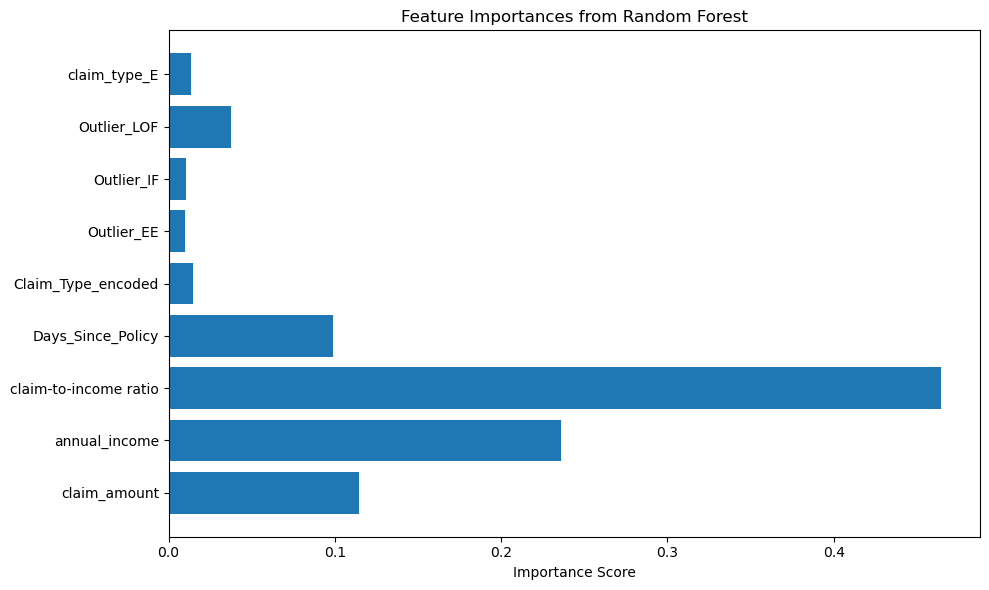

In [38]:
# Now it's safe to access feature importances
feature_importances = rf_model.feature_importances_

# Create bar chart
features = X_train_res.columns  # or X.columns depending on your context
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(features, feature_importances)
plt.xlabel('Importance Score')
plt.title('Feature Importances from Random Forest')
plt.tight_layout()
plt.show()


In [40]:
from sklearn.linear_model import LogisticRegression

# Define the model
lr_model = LogisticRegression()

# Fit the model on training data
lr_model.fit(X_train, y_train)


C:\Users\Ramu M\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Ensure that test data has the same columns as the training data
X_test = X_test[X_train.columns]

# Evaluate Logistic Regression
lr_pred = lr_model.predict(X_test)
print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, lr_pred)}")
print(f"Precision: {precision_score(y_test, lr_pred)}")
print(f"Recall: {recall_score(y_test, lr_pred)}")
print(f"ROC AUC Score: {roc_auc_score(y_test, lr_pred)}")


Logistic Regression Evaluation:
Accuracy: 0.863
Precision: 0.6097560975609756
Recall: 0.17123287671232876
ROC AUC Score: 0.5762487568573353


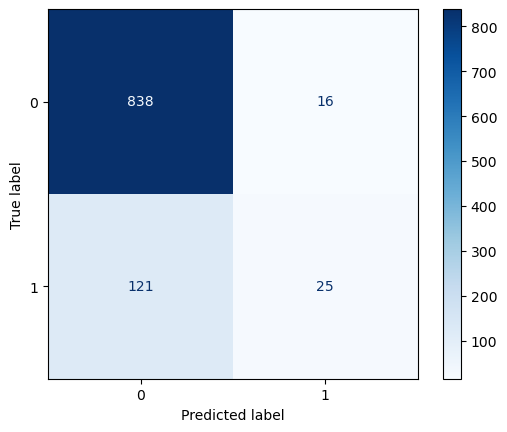

In [42]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using Logistic Regression
lr_pred = lr_model.predict(X_test)

# Compute the confusion matrix
cm = confusion_matrix(y_test, lr_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
disp.plot(cmap='Blues')


In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Train the model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predictions
lr_pred = lr_model.predict(X_test)

# Evaluation
accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)

print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1 Score: {f1_lr}")


Logistic Regression Evaluation:
Accuracy: 0.863
Precision: 0.6097560975609756
Recall: 0.17123287671232876
F1 Score: 0.26737967914438504


C:\Users\Ramu M\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
from sklearn.metrics import classification_report, confusion_matrix

# Evaluate Logistic Regression
lr_pred = lr_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy_lr = accuracy_score(y_test, lr_pred)
precision_lr = precision_score(y_test, lr_pred)
recall_lr = recall_score(y_test, lr_pred)
f1_lr = f1_score(y_test, lr_pred)

print("Logistic Regression Evaluation:")
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1-Score: {f1_lr}")

# Classification Report
print("\nClassification Report (LR):")
print(classification_report(y_test, lr_pred))

# Confusion Matrix
print("\nConfusion Matrix (LR):")
print(confusion_matrix(y_test, lr_pred))


Logistic Regression Evaluation:
Accuracy: 0.863
Precision: 0.6097560975609756
Recall: 0.17123287671232876
F1-Score: 0.26737967914438504

Classification Report (LR):
              precision    recall  f1-score   support

           0       0.87      0.98      0.92       854
           1       0.61      0.17      0.27       146

    accuracy                           0.86      1000
   macro avg       0.74      0.58      0.60      1000
weighted avg       0.84      0.86      0.83      1000


Confusion Matrix (LR):
[[838  16]
 [121  25]]


In [47]:
from sklearn.metrics import roc_auc_score

# Get predicted probabilities for class 1
rf_probabilities = rf_model.predict_proba(X_test)[:, 1]

# Compute AUC-ROC
auc_roc = roc_auc_score(y_test, rf_probabilities)

print(f"AUC-ROC: {auc_roc}")


AUC-ROC: 0.8618427384427834


In [48]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Evaluate Random Forest
rf_pred = rf_model.predict(X_test)
print("\nRandom Forest Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred)}")
print(f"Precision: {precision_score(y_test, rf_pred)}")
print(f"Recall: {recall_score(y_test, rf_pred)}")
print(f"AUC-ROC: {roc_auc_score(y_test, rf_probabilities)}")



Random Forest Evaluation:
Accuracy: 0.873
Precision: 0.5502645502645502
Recall: 0.7123287671232876
AUC-ROC: 0.8618427384427834


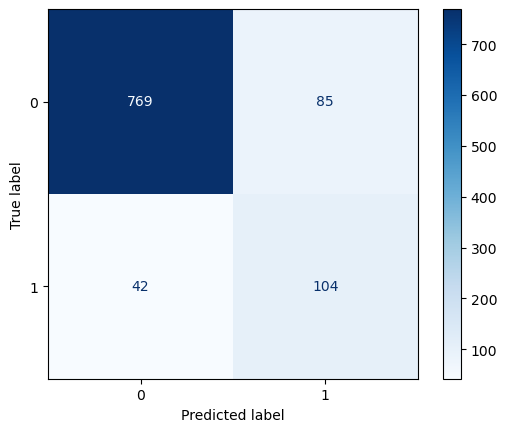

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Predict using Random Forest
rf_pred = rf_model.predict(X_test)

# Compute the confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)

# Display the confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp_rf.plot(cmap='Blues')


In [50]:
# Evaluate Random Forest
rf_pred = rf_model.predict(X_test)

# Calculate and print evaluation metrics
accuracy_rf = accuracy_score(y_test, rf_pred)
precision_rf = precision_score(y_test, rf_pred)
recall_rf = recall_score(y_test, rf_pred)
f1_rf = f1_score(y_test, rf_pred)

print("Random Forest Evaluation:")
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1-Score: {f1_rf}")

# Classification Report
print("\nClassification Report (RF):")
print(classification_report(y_test, rf_pred))

# Confusion Matrix
print("\nConfusion Matrix (RF):")
print(confusion_matrix(y_test, rf_pred))


Random Forest Evaluation:
Accuracy: 0.873
Precision: 0.5502645502645502
Recall: 0.7123287671232876
F1-Score: 0.6208955223880597

Classification Report (RF):
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       854
           1       0.55      0.71      0.62       146

    accuracy                           0.87      1000
   macro avg       0.75      0.81      0.77      1000
weighted avg       0.89      0.87      0.88      1000


Confusion Matrix (RF):
[[769  85]
 [ 42 104]]


Accuracy of XGBoost Model: 87.40%


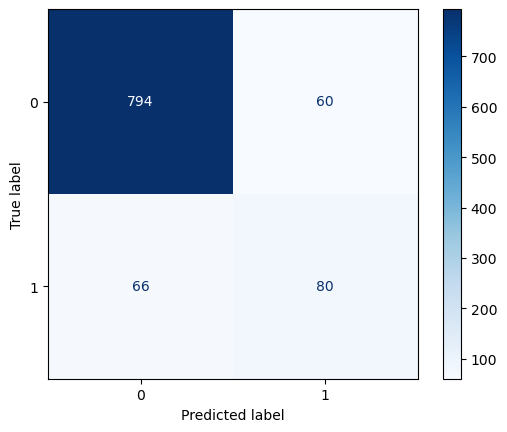

In [51]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Initialize XGBoost model
xgboost_model = xgb.XGBClassifier(eval_metric="mlogloss")

# Fit the model on the training data
xgboost_model.fit(X_train, y_train)

# Predict using the trained model
xgboost_pred = xgboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, xgboost_pred)
print(f"Accuracy of XGBoost Model: {accuracy * 100:.2f}%")

# Compute the confusion matrix for XGBoost
cm_xgb = confusion_matrix(y_test, xgboost_pred)

# Display the confusion matrix
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=xgboost_model.classes_)
disp_xgb.plot(cmap='Blues')


In [52]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict using the trained XGBoost model
xgboost_pred = xgboost_model.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, xgboost_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, xgboost_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, xgboost_pred)
print(f"Recall: {recall}")

# F1-Score
f1 = f1_score(y_test, xgboost_pred)
print(f"F1-Score: {f1}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, xgboost_pred))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgboost_pred)
print("\nConfusion Matrix:")
print(cm_xgb)


Accuracy: 0.874
Precision: 0.5714285714285714
Recall: 0.547945205479452
F1-Score: 0.5594405594405595

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.93      0.93       854
           1       0.57      0.55      0.56       146

    accuracy                           0.87      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.87      0.87      0.87      1000


Confusion Matrix:
[[794  60]
 [ 66  80]]


In [57]:


from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Define and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict and evaluate
xgb_pred = xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, xgb_pred)
print(f"XGBoost Accuracy: {accuracy}")


XGBoost Accuracy: 0.874


C:\Users\Ramu M\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [10:56:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [58]:
df.iloc[0].tolist()

[20635.68,
 120769.55,
 0.0,
 0.0,
 0.1708682362400125,
 2850.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [61]:
feature_names = [
 'claim_amount',
 'annual_income',
 'suspicious_flags',
 'claim-to-income ratio',
 'Days_Since_Policy',
 'Claim_Type_encoded',
 'Outlier_EE',
 'Outlier_IF',
 'Outlier_LOF',
 'claim_type_E'
]


In [64]:
X_train.columns

Index(['claim_amount', 'annual_income', 'claim-to-income ratio',
       'Days_Since_Policy', 'Claim_Type_encoded', 'Outlier_EE', 'Outlier_IF',
       'Outlier_LOF', 'claim_type_E'],
      dtype='object')

In [65]:
import xgboost as xgb

# Assuming you have X_train and y_train ready:
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

feature_names = [
 'claim_amount',
 'annual_income',
 'claim-to-income ratio',
 'Days_Since_Policy',
 'Claim_Type_encoded',
 'Outlier_EE',
 'Outlier_IF',
 'Outlier_LOF',
 'claim_type_E'
]

input_values = [[
    20635.68,
    120769.55,
    0.170868,
    2850,
    1,
    1,
    1,
    1,
    1
]]

input_data = pd.DataFrame(input_values, columns=feature_names)

# Now predict using your trained model
prediction = model.predict(input_data)
# Interpret the prediction
if prediction[0] == 0:
    print("Not a fraud claim")
else:
    print("Fraud claim detected")


Not a fraud claim


In [60]:
df.head()

,claim_amount,annual_income,suspicious_flags,fraud_label,claim-to-income ratio,Days_Since_Policy,Claim_Type_encoded,Outlier_EE,Outlier_IF,Outlier_LOF,claim_type_E
0,20635.68,120769.55,0,0,0.170868,2850,1,1,1,1,1
1,34662.22,412022.47,0,0,0.084127,1827,2,1,1,1,2
2,64847.97,110227.23,0,0,0.588312,456,1,1,1,1,1
3,16906.56,91553.79,0,0,0.184663,3237,2,1,1,1,2
4,64860.47,53075.22,1,1,1.222048,1601,2,1,1,1,2


In [66]:
import pickle

pickle.dump(model, open("fraudclaim_model.pkl", 'wb'))

In [67]:
# loading the saved model
loaded_model = pickle.load(open('fraudclaim_model.pkl', 'rb')) 

In [68]:
for column in X.columns:
  print(column)

claim_amount
annual_income
claim-to-income ratio
Days_Since_Policy
Claim_Type_encoded
Outlier_EE
Outlier_IF
Outlier_LOF
claim_type_E


In [69]:
X_train.dtypes

claim_amount             float64
annual_income            float64
claim-to-income ratio    float64
Days_Since_Policy          int64
Claim_Type_encoded         int32
Outlier_EE                 int32
Outlier_IF                 int32
Outlier_LOF                int32
claim_type_E               int32
dtype: object